In [24]:
#Trigger-Setting ofdmfft|source_sop either edge
import numpy as np  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,10]
import csv
import CommonScript as cs

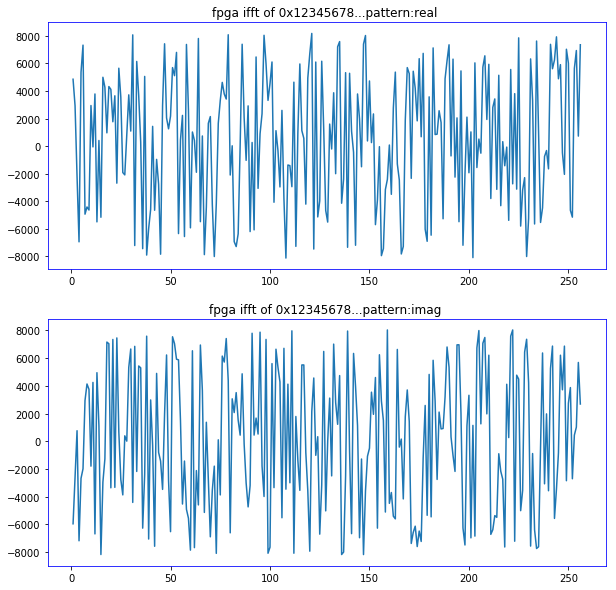

In [32]:
with open('./ReceiverADInput.csv','r') as fp:
    csvBuffer=list(csv.reader(fp))
    plt.figure(figsize=(10,10))
    plt.subplot(211)
    real = np.array(csvBuffer[0],dtype=int)[193::3]
    imag = np.array(csvBuffer[1],dtype=int)[193::3]
    plt.plot(np.linspace(1,256,256),real,'-')
    plt.title('fpga ifft of 0x12345678...pattern:real ')
    plt.subplot(212)
    plt.plot(np.linspace(1,256,256),imag,'-')
    plt.title('fpga ifft of 0x12345678...pattern:imag ')


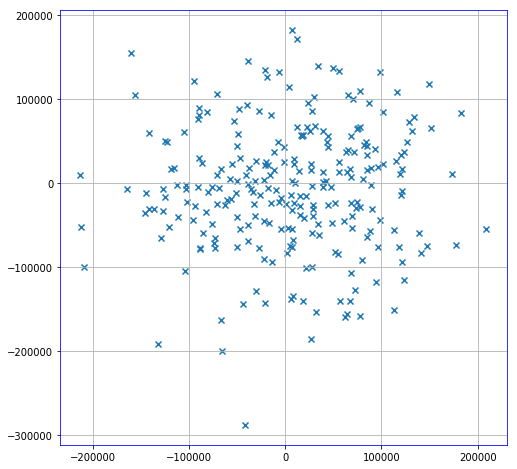

In [33]:
outSignal = real + imag*1j
fftResult  = np.fft.fft(outSignal)
demodReal=np.real(fftResult)
demodImag=np.imag(fftResult)

plt.figure(figsize=(8,8))
plt.grid(True,axis='both',which='major')
plt.scatter(demodReal,demodImag,marker='x')

In [34]:
demodOut = cs.ConstellationDeMapping(demodReal,demodImag)

print(hex(int(demodOut,2)))

0x21c72e80e2d11d8dc77650c069dab88bac88e4a35699b079014f1e5885eb9dd27c26348edfec362ebf2d3becd2f2b804de802b1f0bbe8f6804faa6a07cef290
